In [1]:
import sqlite3

# Create database and table
conn = sqlite3.connect("sales_data.db")
cur = conn.cursor()

cur.execute("""
CREATE TABLE IF NOT EXISTS sales (
    id INTEGER PRIMARY KEY AUTOINCREMENT,
    product TEXT,
    quantity INTEGER,
    price REAL
)
""")

# Sample data
sales_data = [
    ('Product A', 10, 50),
    ('Product B', 5, 100),
    ('Product A', 3, 50),
    ('Product C', 8, 75),
    ('Product B', 2, 100)
]

cur.executemany("INSERT INTO sales (product, quantity, price) VALUES (?, ?, ?)", sales_data)
conn.commit()
conn.close()
print("Database created and sample data inserted.")


Database created and sample data inserted.


In [4]:
import sqlite3
import pandas as pd

# Connect to database
conn = sqlite3.connect("sales_data.db")

# SQL query to calculate total quantity & revenue
query = """
SELECT product,
       SUM(quantity) AS total_quantity,
       SUM(quantity * price) AS total_revenue
FROM sales
GROUP BY product
"""

# Load SQL result into pandas dataframe
df = pd.read_sql_query(query, conn)
conn.close()

print("Sales Summary:")
print(df)


Sales Summary:
     product  total_quantity  total_revenue
0  Product A              13          650.0
1  Product B               7          700.0
2  Product C               8          600.0


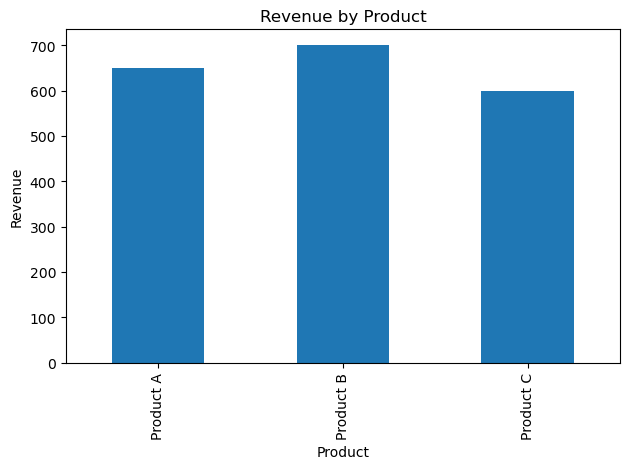

In [5]:
import matplotlib.pyplot as plt

df.plot(kind='bar', x='product', y='total_revenue', legend=False)
plt.title("Revenue by Product")
plt.xlabel("Product")
plt.ylabel("Revenue")
plt.tight_layout()  # To avoid cutting labels
plt.savefig("sales_chart.png")  # Save the chart
plt.show()
